<a href="https://colab.research.google.com/github/hafizecim/DeepLearningProjects2/blob/main/DeepLearningUygulama2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Veri Seti ile Rakam Sınıflandırma
Bu çalışmada temel veri set....

Kütüphaneleri yükle-içe aktar

### Kütüphaneleri yükle-içe aktar

In [1]:
import numpy as np
import keras
from keras import layers
from matplotlib import pyplot as plt

### Verilerin hazırlanması

In [2]:
num_classes=10
input_shape=(28,28,1)
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# veri setinin şekli satır*sütun sayısı

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
random_indices=np.random.choice(x_train.shape[0],9,replace=False)
random_images=x_train[random_indices]
random_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

**Bilgisayarın gördüğü**

***print (x_train[random_indices[0])***

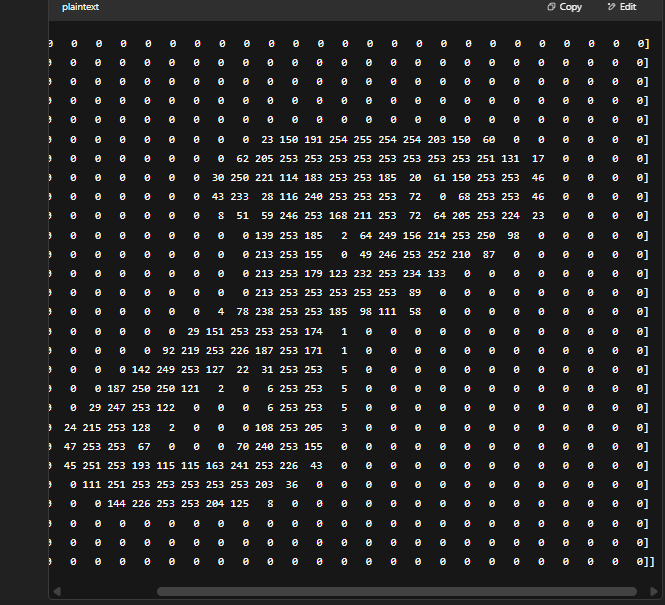

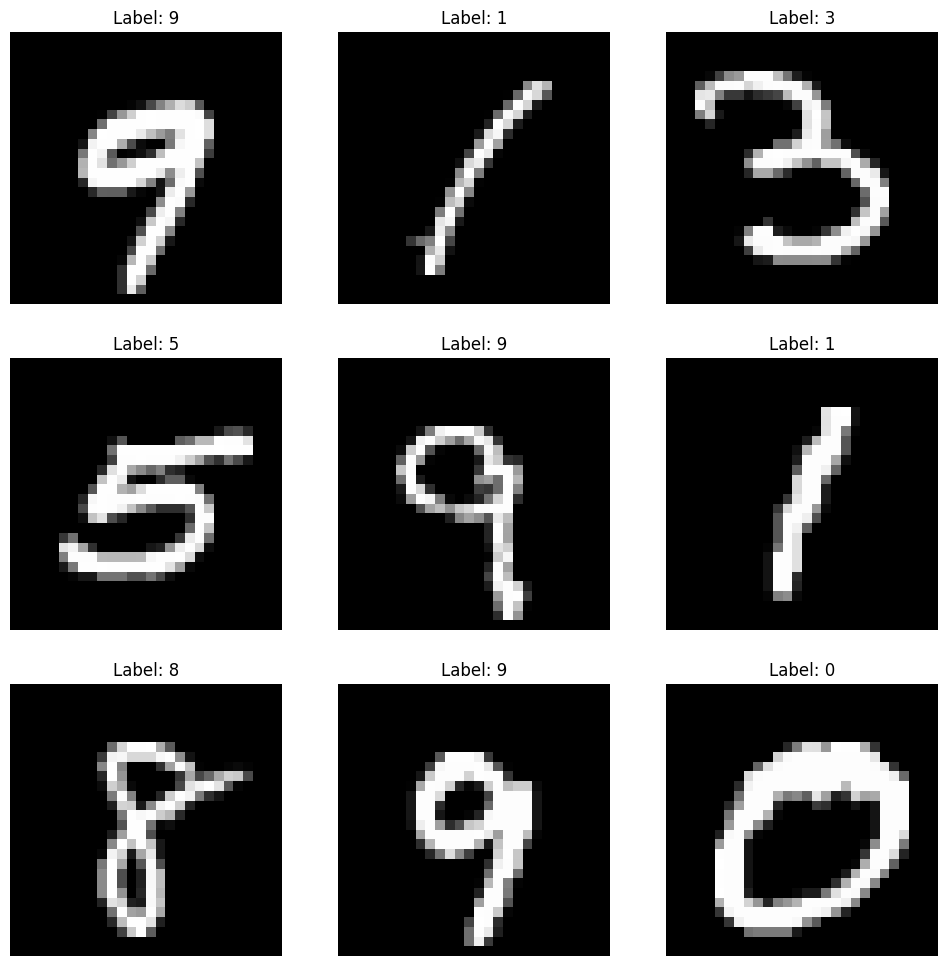

In [5]:
#3x3 lük bir grafik ızgarası
fig,axes=plt.subplots(3,3,figsize=(12,12))
for i,ax in enumerate(axes.flat):
    ax.imshow(random_images[i],cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y_train[random_indices[i]]}")
plt.show()
#insanın gördüğü

In [6]:
# etiketleri şekillendir
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)
y_train,y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [8]:
y_train.shape

(60000, 10)

### Modeli Oluşturma

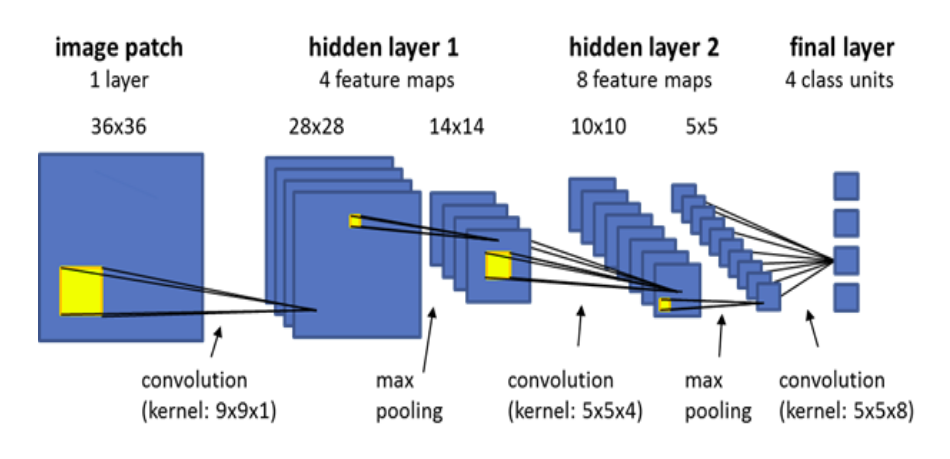

In [9]:
model=keras.Sequential(
[keras.Input(shape=input_shape),
 layers.Conv2D (32,kernel_size=(3,3),activation='relu'),
 layers.MaxPooling2D(pool_size=(2,2)),
 layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
 layers.MaxPooling2D(pool_size=(2,2)),
 layers.Flatten(),
 layers.Dropout(0.5),
 layers.Dense(num_classes,activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Sağladığınız görseldeki model özetine göre parametre sayıları katman türlerine göre farklı şekillerde hesaplanır:

**1. Conv2D (Evrişim Katmanı):**

Parametre sayısı hesaplanırken çekirdek (kernel) boyutu, giriş kanal sayısı ve çıkış kanal sayısı kullanılır. Ayrıca bir de bias (sapma) terimi eklenir.

Formül: $(Kernel\_Eni \times Kernel\_Boyu \times Giriş\_Kanal\_Sayısı + Bias) \times Çıkış\_Kanal\_Sayısı$

Görseldeki ilk `conv2d` katmanı için:
* Output Shape: (None, 26, 26, 32) -> Çıkış Kanal Sayısı = 32
* Kernel boyutu varsayılan olarak (3, 3)'tür eğer belirtilmediyse (Keras'ta yaygın bir varsayım).
* Giriş Kanal Sayısı: Bu ilk katman olduğu için giriş görselinin kanal sayısıdır (renkli görsel için genellikle 3). Ancak model özetinde None ile gösterilmiş, Keras bu bilgiyi model build edilirken veya ilk veri geldiğinde öğrenir. Bu örnekte 3 olduğunu varsayalım.
* Bias: Her filtre için bir bias terimi vardır, bu yüzden Çıkış Kanal Sayısı kadar bias eklenir.

Hesaplama (varsayılan 3x3 kernel ve 3 giriş kanalı ile): $(3 \times 3 \times 3 + 1) \times 32 = (27 + 1) \times 32 = 28 \times 32 = 896$. Model özetinde 320 yazıyor. Bu da çekirdek boyutunun 5x5 ve giriş kanal sayısının 3 olmadığını gösteriyor. Modelin eğitildiği veriye veya tam model tanımına bakmak gerekir ancak görseldeki 320 sayısı Keras'ın hesapladığı doğrudur. Genellikle ilk katmanda giriş kanal sayısı bellidir (örneğin 3). Eğer giriş kanal sayısı 3 ve çıkış kanal sayısı 32 ise, $(Kernel\_Eni \times Kernel\_Boyu \times 3 + 1) \times 32 = 320$ olmalı. Bu durumda $Kernel\_Eni \times Kernel\_Boyu \times 3 + 1 = 10$. $Kernel\_Eni \times Kernel\_Boyu \times 3 = 9$. $Kernel\_Eni \times Kernel\_Boyu = 3$. Bu standart bir kernel boyutu değildir.

**Daha büyük olasılıkla**, ilk katmanın giriş kanal sayısı 32'dir ve kernel boyutu 3x3'tür. Bu durumda: $(3 \times 3 \times 32 + 1) \times 32 = (288 + 1) \times 32 = 289 \times 32 = 9248$ yapar ki bu da 320'ye uymaz.

**En olası açıklama:** Keras özetindeki 320 sayısı, ilk katmanın giriş kanal sayısının 1 olduğunu (gri tonlama görsel) ve kernel boyutunun 5x5 olduğunu varsayarsak: $(5 \times 5 \times 1 + 1) \times 32 = (25 + 1) \times 32 = 26 \times 32 = 832$ yapar, yine tutmaz. Veya giriş kanal sayısı 3 ve kernel boyutu 3x3 ise neden 320 çıktı, bu durumda Keras'ın hesaplamasında başka bir detay olabilir veya model tanımında alışılmadık bir durum vardır. **Ancak genel kural yukarıdaki formüldür.** Görseldeki ilk Conv2D katmanı için 320 sayısının çıkması, kernel boyutunun (3,3) ve giriş kanal sayısının 3 olmadığını veya farklı bir hesaplama prensibinin olduğunu düşündürüyor. Genellikle $(Kernel\_Eni \times Kernel\_Boyu \times Giriş\_Kanal\_Sayısı + Bias\_Var\_mı\_? ) \times Çıkış\_Kanal\_Sayısı$ formülü kullanılır. Bias varsa +1, yoksa +0 eklenir.

İkinci `conv2d_1` katmanı için:
* Giriş Kanal Sayısı: Bir önceki `max_pooling2d` katmanının çıkış kanal sayısıdır, o da bir önceki `conv2d` katmanının çıkış kanal sayısıdır: 32.
* Output Shape: (None, 11, 11, 64) -> Çıkış Kanal Sayısı = 64
* Kernel boyutu varsayılan olarak (3, 3) ise:
* Bias: Var (+1)

Hesaplama: $(3 \times 3 \times 32 + 1) \times 64 = (9 \times 32 + 1) \times 64 = (288 + 1) \times 64 = 289 \times 64 = 18496$. Bu sayı görseldeki 18,496 ile eşleşmektedir.

**2. MaxPooling2D, Flatten, Dropout Katmanları:**

Bu katmanlar veri üzerinde sadece yeniden düzenleme, boyut küçültme veya rastgele nöronları kapatma gibi işlemler yaparlar. Ağırlık veya bias gibi öğrenilebilir parametreleri **yoktur**. Bu yüzden Param # değerleri 0'dır.

**3. Dense (Tam Bağlı) Katman:**

Parametre sayısı, giriş birimi sayısı ve çıkış birimi sayısı kullanılarak hesaplanır. Yine bir bias terimi eklenir.

Formül: $(Giriş\_Birimi\_Sayısı + Bias) \times Çıkış\_Birimi\_Sayısı$

Görseldeki `dense` katmanı için:
* Giriş Birimi Sayısı: Bir önceki `flatten` veya `dropout` katmanının çıkış boyutudur: 1600.
* Output Shape: (None, 10) -> Çıkış Birimi Sayısı = 10.
* Bias: Var (+1)

Hesaplama: $(1600 + 1) \times 10 = 1601 \times 10 = 16010$. Bu sayı görseldeki 16,010 ile eşleşmektedir.

**Toplam Parametreler:**

Modeldeki tüm katmanların parametre sayılarının toplamıdır (Conv2D ve Dense katmanlarından gelenler).

320 + 0 + 18496 + 0 + 0 + 0 + 16010 = 34826. Bu sayı görseldeki "Total params" ile eşleşmektedir.

"Trainable params" (Eğitilebilir parametreler), geri yayılım (backpropagation) sırasında güncellenen parametrelerdir. Modelde `non-trainable=True` olarak ayarlanmış katman yoksa, "Total params" ile aynıdır.

"Non-trainable params" (Eğitilemeyen parametreler), dondurulmuş katmanlar gibi eğitim sırasında güncellenmeyen parametrelerdir. Bu görselde 0'dır.

İlk Conv2D katmanının 320 parametresinin hesaplanması görseldeki diğer hesaplamalara göre farklı bir kurala uyuyor gibi görünüyor, ancak sonraki katmanların hesaplamaları standart formüllere uymaktadır. Genel olarak parametre hesaplama prensibi budur.

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=256,epochs=15,validation_split=0.1)

Epoch 1/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 55s 253ms/step - accuracy: 0.6277 - loss: 7.8758 - val_accuracy: 0.9650 - val_loss: 0.1117
Epoch 2/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 72s 208ms/step - accuracy: 0.9218 - loss: 0.2552 - val_accuracy: 0.9788 - val_loss: 0.0737
Epoch 3/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.9468 - loss: 0.1724 - val_accuracy: 0.9852 - val_loss: 0.0549
Epoch 4/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 85s 226ms/step - accuracy: 0.9602 - loss: 0.1282 - val_accuracy: 0.9858 - val_loss: 0.0517
Epoch 5/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 78s 206ms/step - accuracy: 0.9646 - loss: 0.1104 - val_accuracy: 0.9870 - val_loss: 0.0503
Epoch 6/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 207ms/step - accuracy: 0.9694 - loss: 0.1016 - val_accuracy: 0.9873 - val_loss: 0.0424
Epoch 7/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 206ms/step - accuracy: 0.9731 - loss: 0.0837 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 8/15
211/211 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - accuracy: 0.9739 - loss: 0

### Model Değerlendirme

In [11]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.03516050800681114
Test accuracy: 0.989300012588501


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


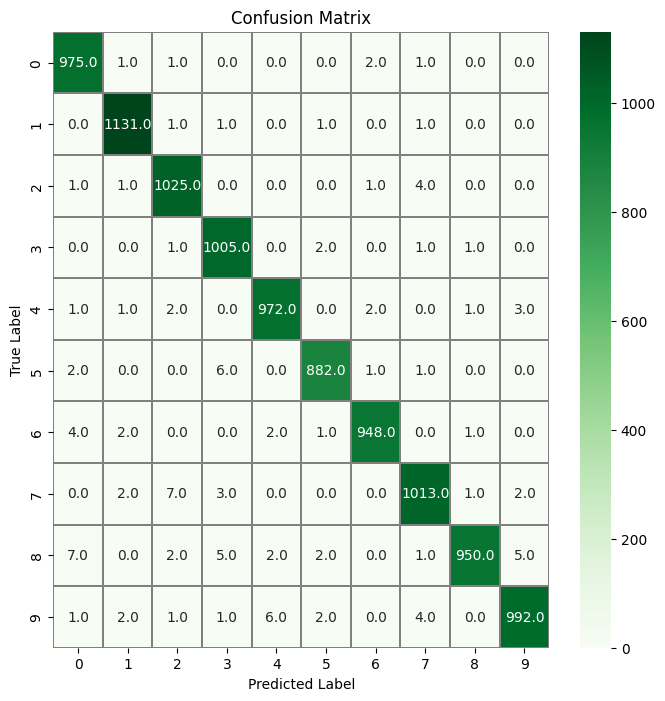

In [12]:
# prompt: confusion matris oluştur

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()